**TO DO**

https://towardsdatascience.com/exploratory-data-analysis-for-natural-language-processing-ff0046ab3571

https://marcobonzanini.com/2015/03/09/mining-twitter-data-with-python-part-2/

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Packages" data-toc-modified-id="Load-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Packages</a></span></li><li><span><a href="#Analysis-timeline-data" data-toc-modified-id="Analysis-timeline-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis timeline data</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><span><a href="#Data-user-timeline-:-@picnic,-@JumboSupermarkt,-@albertijn" data-toc-modified-id="Data-user-timeline-:-@picnic,-@JumboSupermarkt,-@albertijn-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Data user timeline : @picnic, @JumboSupermarkt, @albertijn</a></span></li></ul></li><li><span><a href="#Checking-loaded-data-and-further-cleaning" data-toc-modified-id="Checking-loaded-data-and-further-cleaning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Checking loaded data and further cleaning</a></span><ul class="toc-item"><li><span><a href="#@picnic" data-toc-modified-id="@picnic-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>@picnic</a></span></li><li><span><a href="#@JumboSupermarkten" data-toc-modified-id="@JumboSupermarkten-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>@JumboSupermarkten</a></span></li><li><span><a href="#@albertheijn" data-toc-modified-id="@albertheijn-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>@albertheijn</a></span></li></ul></li><li><span><a href="#Cleaning-Tweets" data-toc-modified-id="Cleaning-Tweets-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Cleaning Tweets</a></span></li></ul></li><li><span><a href="#To-work-with-Dutch-language" data-toc-modified-id="To-work-with-Dutch-language-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>To work with Dutch language</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Number-of-followers-and-friends" data-toc-modified-id="Number-of-followers-and-friends-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Number of followers and friends</a></span></li><li><span><a href="#Languages-of-messages" data-toc-modified-id="Languages-of-messages-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Languages of messages</a></span></li></ul></li><li><span><a href="#Analysing-Queries" data-toc-modified-id="Analysing-Queries-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analysing Queries</a></span><ul class="toc-item"><li><span><a href="#Load-query-data" data-toc-modified-id="Load-query-data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Load query data</a></span></li></ul></li></ul></div>

**TO ADAPT AND INSERT SOMEWHERE**

attributes are the following:

text: the text of the tweet itself

created_at: the date of creation

favorite_count, retweet_count: the number of favourites and retweets

favorited, retweeted: boolean stating whether the authenticated user (you) have favourited or retweeted this tweet

lang: acronym for the language (e.g. “en” for english)

id: the tweet identifier

We can imagine how these data already allow for some interesting analysis: we can check who is most favourited/retweeted, who’s discussing with who, what are the most popular hashtags and so on. Most of the goodness we’re looking for, i.e. the content of a tweet, is anyway embedded in the text, and that’s where we’re starting our analysis.

**MY GOAL**

1. Cleaning
    Clean text without tokenize (at least no using a tokenizer) neither remove stop words.
    
    Complement my function checking :
    
    http://localhost:8889/notebooks/Project_Twitter/planing%20twitter%20project.ipynb
    
    https://marcobonzanini.com/2015/03/09/mining-twitter-data-with-python-part-2/
    
    


and create 2 columns:

sentiment_score: 

sentiment: neg (<0), pos (>0), neutral (0)

In some vizualizations groupby supermarkt, sentiment and then:

- check most frequent words : pos and negative
- check timeline of the 3 supermarkts pos and neg
- Build Word Cloud using mask (tokenize and remove stop words)

- tokenize using split() - dividing by space and use the dutch stopwords because 
"It must be trained on a large collection of plaintext in the target language before it can be used." https://www.nltk.org/api/nltk.tokenize.html



# Load Packages

In [6]:
# import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

TodaysDate = time.strftime("%Y-%m-%d")

# Analysis timeline data

## Load data

### Data user timeline : @picnic, @JumboSupermarkt, @albertijn

In [25]:
# loading the most recent data
df_picnic = pd.read_csv("../data/tweets/picnic_2020-06-22-14-51.csv")

df_jumbo = pd.read_csv("../data/tweets/JumboSupermarkt_2020-06-22-15-01.csv")

# loading the combined data of AH (retrieved 16/06 and 22/06) 

df_ah = pd.read_csv("../data/processed/AH_concat_16_and_22_June_2020-06-22.csv")

## Checking loaded data and further cleaning

### @picnic

In [26]:
df_picnic.head(2)

,mined_at,created_at,year,month,day,day_of_week,hour,minute,screen_name,tweet_id,tweet_id_str,retweet_count,favorite_count,source,language,user_favourites_count,followers_count,friends_count,text
0,2020-06-22 14:51:29.398041,2018-12-07 15:06:19+00:00,2018,12,7,4,15,6,picnic,1071058330003623936,1071058330003623936,0,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",nl,3885,4844,5,@MiriamKrooswijk Spannend Miriam! Laat ons eve...
1,2020-06-22 14:51:29.398041,2018-12-07 15:24:06+00:00,2018,12,7,4,15,24,picnic,1071062804998877184,1071062804998877184,0,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",nl,3885,4844,5,@MiriamKrooswijk Dat is balen zeg Miriam. Wij ...


In [27]:
df_picnic.tail(2)

,mined_at,created_at,year,month,day,day_of_week,hour,minute,screen_name,tweet_id,tweet_id_str,retweet_count,favorite_count,source,language,user_favourites_count,followers_count,friends_count,text
3219,2020-06-22 14:51:23.924863,2020-06-22 09:28:32+00:00,2020,6,22,0,9,28,picnic,1274997691056037892,1274997691056037892,0,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en,3885,4844,5,@peachchocobo ☺️ ^Wesley https://t.co/IV9JhSAQG0
3220,2020-06-22 14:51:23.924863,2020-06-22 09:39:23+00:00,2020,6,22,0,9,39,picnic,1275000421883527169,1275000421883527169,0,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",nl,3885,4844,5,@peachchocobo Dankjewel voor het mooie complim...


In [5]:
df_picnic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mined_at               3221 non-null   object 
 1   created_at             3221 non-null   object 
 2   year                   3221 non-null   int64  
 3   month                  3221 non-null   int64  
 4   day                    3221 non-null   int64  
 5   day_of_week            3221 non-null   int64  
 6   hour                   3221 non-null   int64  
 7   minute                 3221 non-null   int64  
 8   screen_name            3221 non-null   object 
 9   tweet_id               3221 non-null   int64  
 10  tweet_id_str           3221 non-null   int64  
 11  retweet_count          3221 non-null   int64  
 12  favorite_count         49 non-null     float64
 13  source                 3221 non-null   object 
 14  language               3221 non-null   object 
 15  user

In the previous notebook we saw that sometimes the language is not exactly what is labeled, at least when I've tried to use `langdetect`. Would it be possible that the labels already provided by twitter are mistaken?

In [58]:
picnic_langs_count = df_picnic['language'].value_counts(normalize=True)
picnic_langs_count

nl     0.907172
und    0.058988
en     0.027942
es     0.001552
de     0.001242
fr     0.000931
in     0.000621
fi     0.000310
cy     0.000310
it     0.000310
ht     0.000310
sv     0.000310
Name: language, dtype: float64

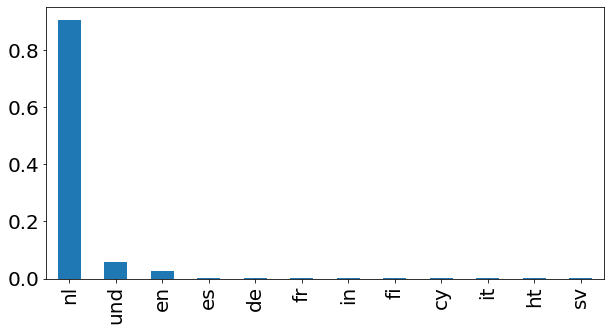

In [60]:
picnic_langs_count.plot.bar(figsize=(10,5), fontsize=20)

Great part is Dutch ('nl'). Let's check the other ones.

In [51]:
df_picnic['text'][df_picnic['language']=='und'].values

array(['@MalibuInfo https://t.co/fmQxyLn42c',
       '@Dieniehh https://t.co/BlpG7f1b5G',
       '@robinvanholst @albertheijn https://t.co/OfrYH4B6CE',
       '@Cathvapes https://t.co/PGQcMxEB6t',
       '@Cathvapes https://t.co/FOzdJYyH10', '@Cathvapes En?',
       '@Nour_Alchazli https://t.co/fUH3EWfJcc',
       '@roderick_online https://t.co/7i6lj76Hl9', '@vlknbrg 🐸',
       '@Craften https://t.co/EuRbpMntnG',
       '@broekmansvenlo https://t.co/aIhvryZzce',
       '@rolandweyers https://t.co/xqNTgtZhKO',
       '@RuthGorissen https://t.co/PQ3wuB9kh9',
       '@deligted https://t.co/nuRooqVExL',
       '@ClaudiaHvO https://t.co/Mr9HCAiqMI',
       '@TheRealEelco https://t.co/OBRgMxDcC8',
       '@ZOuftir https://t.co/4MAFKnEUFL', '@Papahen68 🔥🙌',
       '@1983Marieke @albertheijn @JumboSupermarkt https://t.co/M20jGa80TZ',
       '@Rubiniaaa https://t.co/xGSEcLq0x2',
       '@Apekop0181 https://t.co/K8Q3l3CRfG',
       '@VerzWrk https://t.co/kQns227xJ4', '@Michelterbraak 🍌🙊',
      

I didn't find 'und' in [language codes](https://developer.twitter.com/en/docs/developer-utilities/supported-languages/api-reference/get-help-languages) but it seems to be related to links (see above). The other ones are all availables. I just want to check if they are right because it will be important for the sentiment analysis.

In [52]:
df_picnic['text'][df_picnic['language']=='en'].values

array(['Last year, our customers donated 31,893 products to the Dutch Food Bank Foundation. This year we are trying to top that, and we are off to a good start. From today until 16th December you can donate a meal for people in need. Help us make a difference! https://t.co/FK02oqByz0',
       '@laurenboyle2018 Hi Lauren! How unfortunate! Can you maybe tell me what happened in a DM? :)',
       'Recently, the team has started using React Native. Want to know why? @larslockefeer spills the beans:\n\nhttps://t.co/YUPr5UzheG',
       "@erikkeegstra @sooqrcom Because of the holidays it's a bit busier at the moment, after that we try to give you access as soon as possible! :)",
       "@freebootcrvte Thanks for your input! It's great to receive ideas from our customers. Maybe one day soon we can add these features to our app! Will you send me a DM with your personal info, this way I can update my colleagues from our technical team! :)",
       '@femkesvs We only have a Dutch version of the a

After a quick look it seems to be english indeed.

In [53]:
df_picnic['text'][df_picnic['language']=='es'].values

array(['@ElgerHoekstra Sí. Es un buen chiste 😉',
       '@ElgerHoekstra &lt;p&gt;Sí. Es un buen chiste! &lt;/p&gt;',
       '@broekmansvenlo Verdiend! https://t.co/40ZQ81aHnO',
       '@Carminattihenri Te entendemos ;)',
       '@dbenshachar ^Lino https://t.co/XK06YZyXVh'], dtype=object)

One Dutch in the middle of the Spanish.

In [54]:
df_picnic['text'][df_picnic['language']=='de'].values

array(['@ihrzu Freut uns wirklich, dass du so zufrieden bist mit uns :)',
       '@RadRitter Hi, wir nehmen leider nur Flaschen mit, da die Kästen nicht in unsere speziellen Stecksystem passen, das tut mir leid. Du kannst aber so viele Flaschen abgeben, wie du möchtest. Viele Grüße :)',
       '@Papahen68 @RWArmy12 Tot morgen, Henri! 🙌 ^Yannick',
       '@ITSANNIEVEE Tja... ^Yannick https://t.co/XDV1CjnfWp'],
      dtype=object)

Again, one Dutch in the middle of the German.

In [55]:
df_picnic['text'][df_picnic['language']=='fr'].values

array(['@HenriBV Jammie 😋 #deliciousfood',
       '@DeniseHilhorst Enjoy the chocolate! ^Mylène',
       '@marciplan Je bent niet de enige. 😉 ^Valérie https://t.co/DqkvouJtfM'],
      dtype=object)

No French here. 

### @JumboSupermarkten

In [61]:
df_jumbo.head(2)

,mined_at,created_at,year,month,day,day_of_week,hour,minute,screen_name,tweet_id,tweet_id_str,retweet_count,favorite_count,source,language,user_favourites_count,followers_count,friends_count,text
0,2020-06-22 15:00:58.855426,2020-03-07 20:15:43+00:00,2020,3,7,5,20,15,JumboSupermarkt,1236385056786128897,1236385056786128897,0,NaN,"<a href=""http://www.salesforce.com"" rel=""nofol...",nl,3764,16209,1711,"@FilGwenTygoSem Hallo Gwen, er worden inderdaa..."
1,2020-06-22 15:00:58.855426,2020-03-07 20:26:52+00:00,2020,3,7,5,20,26,JumboSupermarkt,1236387863492689921,1236387863492689921,0,NaN,"<a href=""http://www.salesforce.com"" rel=""nofol...",nl,3764,16209,1711,"@smnrsch65 Wat super, bedankt voor je reactie!..."


In [62]:
df_jumbo.tail(2)

,mined_at,created_at,year,month,day,day_of_week,hour,minute,screen_name,tweet_id,tweet_id_str,retweet_count,favorite_count,source,language,user_favourites_count,followers_count,friends_count,text
3230,2020-06-22 15:00:54.106695,2020-06-22 11:00:44+00:00,2020,6,22,0,11,0,JumboSupermarkt,1275020894201618434,1275020894201618434,0,NaN,"<a href=""http://www.salesforce.com"" rel=""nofol...",nl,3764,16209,1711,@ricardoboersma Hallo! Dat mailadres is inderd...
3231,2020-06-22 15:00:54.106695,2020-06-22 11:03:38+00:00,2020,6,22,0,11,3,JumboSupermarkt,1275021624765530116,1275021624765530116,0,NaN,"<a href=""http://www.salesforce.com"" rel=""nofol...",nl,3764,16209,1711,"@Nijhuus Hallo Gertjan, bieraanbiedingen versc..."


In [63]:
df_jumbo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mined_at               3232 non-null   object 
 1   created_at             3232 non-null   object 
 2   year                   3232 non-null   int64  
 3   month                  3232 non-null   int64  
 4   day                    3232 non-null   int64  
 5   day_of_week            3232 non-null   int64  
 6   hour                   3232 non-null   int64  
 7   minute                 3232 non-null   int64  
 8   screen_name            3232 non-null   object 
 9   tweet_id               3232 non-null   int64  
 10  tweet_id_str           3232 non-null   int64  
 11  retweet_count          3232 non-null   int64  
 12  favorite_count         13 non-null     float64
 13  source                 3232 non-null   object 
 14  language               3232 non-null   object 
 15  user

In [64]:
jumbo_langs_count = df_jumbo['language'].value_counts(normalize=True)
jumbo_langs_count

nl     0.969059
en     0.021040
und    0.007735
in     0.000928
de     0.000619
da     0.000309
tl     0.000309
Name: language, dtype: float64

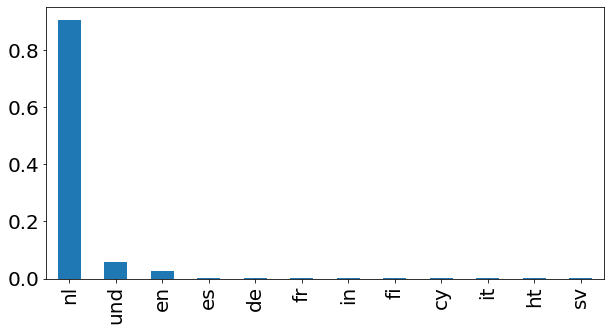

In [60]:
jumbo_langs_count.plot.bar(figsize=(10,5), fontsize=20)

### @albertheijn

In [65]:
df_ah.head(2)

,mined_at,screen_name,tweet_id,tweet_id_str,created_at,year,month,day,day_of_week,hour,minute,retweet_count,source,text,language,favorite_count,user_favourites_count,followers_count,friends_count
0,2020-06-16 22:17:43.708324,albertheijn,1244535843135672326,1244535843135672326,2020-03-30 08:04:02+00:00,2020,3,30,0,8,4,0,"<a href=""https://www.tracebuzz.com"" rel=""nofol...","@derots Voorraad is er genoeg, het is voor ons...",nl,NaN,NaN,NaN,NaN
1,2020-06-16 22:17:43.708324,albertheijn,1244538454890987523,1244538454890987523,2020-03-30 08:14:24+00:00,2020,3,30,0,8,14,0,"<a href=""https://www.tracebuzz.com"" rel=""nofol...",@MoniquevDBurgh We doen er alles aan om zoveel...,nl,NaN,NaN,NaN,NaN


In [66]:
df_ah.tail(2)

,mined_at,screen_name,tweet_id,tweet_id_str,created_at,year,month,day,day_of_week,hour,minute,retweet_count,source,text,language,favorite_count,user_favourites_count,followers_count,friends_count
3419,2020-06-22 15:03:31.445447,albertheijn,1275029563542851585,1275029563542851585,2020-06-22 11:35:11+00:00,2020,6,22,0,11,35,0,"<a href=""https://www.tracebuzz.com"" rel=""nofol...",@Claire94175123 Hi! Helaas kunnen tickets nie...,nl,NaN,580.0,45532.0,6.0
3420,2020-06-22 15:03:31.445447,albertheijn,1275031595708276736,1275031595708276736,2020-06-22 11:43:16+00:00,2020,6,22,0,11,43,0,"<a href=""https://www.tracebuzz.com"" rel=""nofol...",@RhidoInfo Hoi. Vanaf maandag 22 juni krijgt d...,nl,NaN,580.0,45532.0,6.0


In [67]:
df_ah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421 entries, 0 to 3420
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mined_at               3421 non-null   object 
 1   screen_name            3421 non-null   object 
 2   tweet_id               3421 non-null   int64  
 3   tweet_id_str           3421 non-null   int64  
 4   created_at             3421 non-null   object 
 5   year                   3421 non-null   int64  
 6   month                  3421 non-null   int64  
 7   day                    3421 non-null   int64  
 8   day_of_week            3421 non-null   int64  
 9   hour                   3421 non-null   int64  
 10  minute                 3421 non-null   int64  
 11  retweet_count          3421 non-null   int64  
 12  source                 3421 non-null   object 
 13  text                   3421 non-null   object 
 14  language               3421 non-null   object 
 15  favo

In [69]:
ah_langs_count = df_ah['language'].value_counts(normalize=True)
ah_langs_count

nl     0.969015
en     0.021631
und    0.001754
et     0.001462
fr     0.001462
tr     0.001169
fi     0.000585
da     0.000585
in     0.000585
pl     0.000292
de     0.000292
is     0.000292
ht     0.000292
es     0.000292
sv     0.000292
Name: language, dtype: float64

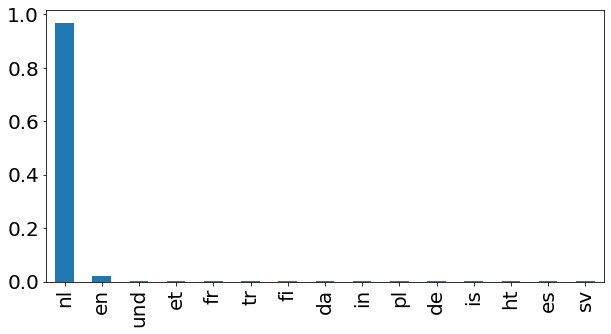

In [70]:
ah_langs_count.plot.bar(figsize=(10,5), fontsize=20)

As seen for three online grocery stores more the 90% of the messages are in dutch so we will be ignoring the other languages and we will consider for all the period covered by the data of AH.

In [79]:
# transforming 'create_at' in datetime type

df_picnic['created_at'] = pd.to_datetime(df_picnic['created_at'])
df_jumbo['created_at'] = pd.to_datetime(df_jumbo['created_at'])
df_ah['created_at'] = pd.to_datetime(df_ah['created_at'])

In [80]:
min_date = min(df_ah['created_at'])

In [81]:
df_concat = pd.concat([df_picnic[df_picnic['created_at']>=min_date],df_jumbo[df_jumbo['created_at']>=min_date], df_ah])
df_concat.head()

,mined_at,created_at,year,month,day,day_of_week,hour,minute,screen_name,tweet_id,tweet_id_str,retweet_count,favorite_count,source,language,user_favourites_count,followers_count,friends_count,text
2789,2020-06-22 14:51:24.549235,2020-03-30 09:13:01+00:00,2020,3,30,0,9,13,picnic,1244553206694322181,1244553206694322181,0,NaN,"<a href=""http://www.zendesk.com"" rel=""nofollow...",nl,3885.0,4844.0,5.0,@De_Neliz Het is inderdaad drukker dan normaal...
2790,2020-06-22 14:51:24.549235,2020-03-30 09:44:36+00:00,2020,3,30,0,9,44,picnic,1244561152668991488,1244561152668991488,0,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",nl,3885.0,4844.0,5.0,@xelysemelissa Helaas kun je geen bestelling w...
2791,2020-06-22 14:51:24.549235,2020-03-30 15:18:29+00:00,2020,3,30,0,15,18,picnic,1244645178335473665,1244645178335473665,0,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",nl,3885.0,4844.0,5.0,@JoopRutte Ik snap dat je nu vast honger hebt....
2792,2020-06-22 14:51:24.549235,2020-03-30 15:53:29+00:00,2020,3,30,0,15,53,picnic,1244653986290032657,1244653986290032657,0,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",nl,3885.0,4844.0,5.0,"@DeOverdenking Haha ohjee, daar bezorgen we he..."
2793,2020-06-22 14:51:24.549235,2020-03-30 19:08:00+00:00,2020,3,30,0,19,8,picnic,1244702938641072129,1244702938641072129,0,NaN,"<a href=""http://www.zendesk.com"" rel=""nofollow...",nl,3885.0,4844.0,5.0,@yolandestrikker De vraag is helaas groter dan...


In [82]:
df_concat.sort_values(by='created_at',inplace=True)
df_concat.reset_index(drop=True, inplace = True)

In [83]:
df_concat.head()

,mined_at,created_at,year,month,day,day_of_week,hour,minute,screen_name,tweet_id,tweet_id_str,retweet_count,favorite_count,source,language,user_favourites_count,followers_count,friends_count,text
0,2020-06-16 22:17:43.708324,2020-03-30 08:04:02+00:00,2020,3,30,0,8,4,albertheijn,1244535843135672326,1244535843135672326,0,NaN,"<a href=""https://www.tracebuzz.com"" rel=""nofol...",nl,NaN,NaN,NaN,"@derots Voorraad is er genoeg, het is voor ons..."
1,2020-06-16 22:17:43.708324,2020-03-30 08:14:24+00:00,2020,3,30,0,8,14,albertheijn,1244538454890987523,1244538454890987523,0,NaN,"<a href=""https://www.tracebuzz.com"" rel=""nofol...",nl,NaN,NaN,NaN,@MoniquevDBurgh We doen er alles aan om zoveel...
2,2020-06-16 22:17:43.708324,2020-03-30 08:23:12+00:00,2020,3,30,0,8,23,albertheijn,1244540668225126401,1244540668225126401,0,NaN,"<a href=""https://www.tracebuzz.com"" rel=""nofol...",nl,NaN,NaN,NaN,@AnnekeVisser15 Klopt! De Persoonlijke Bonus w...
3,2020-06-16 22:17:43.519106,2020-03-30 08:26:12+00:00,2020,3,30,0,8,26,albertheijn,1244541424588251141,1244541424588251141,0,NaN,"<a href=""https://www.tracebuzz.com"" rel=""nofol...",nl,NaN,NaN,NaN,@waltervantiel We kopen groenten en fruit z...
4,2020-06-16 22:17:43.519106,2020-03-30 08:30:44+00:00,2020,3,30,0,8,30,albertheijn,1244542564344238083,1244542564344238083,0,NaN,"<a href=""https://www.tracebuzz.com"" rel=""nofol...",nl,NaN,NaN,NaN,@bbstring Je kunt ons het beste een privéberic...


In [84]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6113 entries, 0 to 6112
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   mined_at               6113 non-null   object             
 1   created_at             6113 non-null   datetime64[ns, UTC]
 2   year                   6113 non-null   int64              
 3   month                  6113 non-null   int64              
 4   day                    6113 non-null   int64              
 5   day_of_week            6113 non-null   int64              
 6   hour                   6113 non-null   int64              
 7   minute                 6113 non-null   int64              
 8   screen_name            6113 non-null   object             
 9   tweet_id               6113 non-null   int64              
 10  tweet_id_str           6113 non-null   int64              
 11  retweet_count          6113 non-null   int64            

## Cleaning Tweets

In [ ]:
# from my evanescence project

def remove_accented_chars(text):
    """ remove accents"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def removebrackets(text):
    """ remove brackets """
    return re.sub('[\(\[].*?[\)\]]', ' ', text)

def remove_special_chars(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    return re.sub(pattern, '', text)

def clean_text(text):
    
    cleaned_text = text.apply(lambda x: removebrackets(x))
    cleaned_text = cleaned_text.apply(lambda x: remove_accented_chars(x))
    cleaned_text = cleaned_text.apply(lambda x: remove_special_chars(x))
    # lowercase
    cleaned_text = cleaned_text.apply(lambda x: x.lower())
    
    return cleaned_text

# my Trump project

#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

#Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

# functions for cleaning 

# Remove all the non ascii values
def remove_non_ascii(text):
    return unidecode(str(text))#, encoding = "utf-8"))

# Remove all the https's from the text
def strip_links(text):
    return re.sub("(?P<url>https?://[^\s]+)", '', text)

# Remove all the retweets and hastags
def strip_char(text):
    return re.sub("[#@].+?(?= |$)", '', text)

def remove_html_tags(text):
    soup = BeautifulSoup(unescape(text), 'lxml')
    return soup.text

def data_clean(df, column):
    cleaning_list = ["\r", "+", ":","#","$","/","(<br/>)","(<a).*(>).*(</a>)","(&amp)","(&gt)","(&lt)","(\xa0)","\n"]
    for item in cleaning_list:
        df[column] = df[column].str.replace(item, "")
        df[column] = df[column].str.replace("\'s","'s")
    return df[column]
        #for text in df[column]:

# Cleaninf function that removes emoticons, stopwords and punctuations
# def clean_tweets(tweet): 
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(tweet)
#     #removing mentions
#     tweet = re.sub(r':', '', tweet)
#     tweet = re.sub(r'‚Ä¶', '', tweet)
#     #replace consecutive non-ASCII characters with a space
#     tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
#     #remove emojis from tweet
#     tweet = emoji_pattern.sub(r'', tweet)
#     #filter using NLTK library append it to a string
#     filtered_tweet = [w for w in word_tokens if not w in stop_words]
#     filtered_tweet = []
#     #looping through conditions
#     for w in word_tokens:
#     #check tokens against stop words , emoticons and punctuations
#         if w not in stop_words and w not in emoticons and w not in string.punctuation:
#             filtered_tweet.append(w)
#     return ' '.join(filtered_tweet)

# clean_tweets modified to keep stopwords

def clean_tweets(tweet): 
#     stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
    #removing mentions
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
    #remove emojis from tweet
    tweet = emoji_pattern.sub(r'', tweet)
    #filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []
    #looping through conditions
    for w in word_tokens:
    #check tokens against stop words , emoticons and punctuations
        if w not in emoticons and w not in string.punctuation:
            filtered_tweet.append(w)
    return ' '.join(filtered_tweet)


# To work with Dutch language

In [71]:
import spacy # fast NLP
# import pandas as pd # dataframes
# import langid # language identification (i.e. what language is this?)
# from nltk.classify.textcat import TextCat # language identification from NLTK
# from matplotlib.pyplot import plot # not as good as ggplot in R :p

In [ ]:
python -m spacy download nl_core_news_sm

In [77]:
# create a Spacy document of our tweets
# load an English-language Spacy model
# nlp = spacy.load("en")

# go to https://spacy.io/models/nl

nlp_nl = spacy.load('nl_core_news_sm')

df_picnin_nl = df_picnic[df_picnic['language']=='nl']

# apply the english language model to our tweets
doc = nlp_nl(', '.join(df_picnic['text']))

In [78]:
# checking 5 longest tweets - just testing model

sorted(doc, key=len, reverse=True)[0:5]

[bezorger!#bettersafethansorry,
 eenmaalerbijnooitmeerinderij,
 snel!#geduldiseenschonezaak,
 proostopeensuccesvoloverleg,
 spitsuurinboodschappenland]

In [74]:
doc[:5]

@MiriamKrooswijk Spannend Miriam! Laat

# EDA

In [ ]:
# concatenate all dataframes

df_tweet_conc = pd.concat([df_picnic,df_JumboSupermarkt, df_albertheijn])
df_tweet_conc.head()

In [ ]:
df_tweet_conc.shape[0] == df_picnic.shape[0]+df_JumboSupermarkt.shape[0]+df_albertheijn.shape[0]

## Number of followers and friends 

## Languages of messages

# Analysing Queries

## Load query data